# PROBLEM STATEMENT for ANN:
Dataset Link - advertising.csv    
In this assignment you will be working with a dummy advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. you will try to create a model that will predict whether or not they will click on an ad based on the features of that user.
This data set contains the following features:
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad
For the dataset (Advertising dataset), implement the ANN classifier using Keras in Python. [5M]
Dataset: Advertising Dataset.csv
The marks distribution are as follows:
1.	Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
2.	Split features and labels [0.5M]
3.	Split train and test data [0.5M]
4.	Implement ANN Classifier using Keras [2M]
5.	Calculate accuracy measures [1M]

Justify model.

For any Queries on this question, Contact: sanjjayyp@wilp.bits-pilani.ac.in


### Q1: Import the libraries and Load the dataset and Remove/replace missing values (if any) 
Importing required libraries

In [64]:
#Dependencies
import numpy as np
import pandas as pd
import os

In [65]:
#dataset import
#to set up the current directory for input car dataset
#place advertising.csv file under the same dir where this .ipynb file is placed.
__location__ = os.path.realpath(os.getcwd())
for dirname, _, filenames in os.walk(__location__):
    for filename in filenames:
        if filename == 'advertising.csv':
            input_data = os.path.join(dirname, filename)
print(input_data)
dataset = pd.read_csv(input_data)
dataset.head(10) #Return 10 rows of data

C:\Users\sr20052253\Workspace\advertising.csv


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [66]:
dataset.shape

(1000, 10)

### Outlier and Null data detection

In [67]:
#ULS Outlier and null value check
#  1 hot encoding
print('Size :',dataset.shape)
#print('City :',len(pd.unique(dataset['City'])))
#print('Country :',len(pd.unique(dataset['Country'])))
print('\n\n DTypes :\n',dataset.dtypes)
print('\n\nNull Count :\n',dataset.isnull().sum())
print('\n\nDescribe :')
dataset.describe()

Size : (1000, 10)


 DTypes :
 Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object


Null Count :
 Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


Describe :


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000



Above output shows no null data and oulier in dataset

### Q2: Split features and labels 


In [68]:
##ULS 
#  1 hot encoding, 'Ad Topic Line'
print(len(dataset['Ad Topic Line'].value_counts()))
#dataset['Ad Topic Line'].value_counts()

1000


In [69]:
#Drop 'Ad Topic Line', all 1000 values are unqiue
dataset=dataset.drop( columns='Ad Topic Line')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [70]:
##ULS 
#  1 hot encoding, 'City'
print(len(dataset['City'].value_counts()))
#dataset['Ad Topic Line'].value_counts()

969


In [71]:
#Drop 'City', all 1000 values has 969  unqiue Cities
dataset=dataset.drop( columns='City')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0


In [72]:
##ULS 
#  1 hot encoding, 'Country'
print(len(dataset['Country'].value_counts()))
#dataset['Ad Topic Line'].value_counts()

237


In [73]:
#Drop 'Country', all 1000 values has 237 unqiue (Almost on an average of 4 enties for same country)
dataset=dataset.drop( columns='Country')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [74]:
##ULS 
#  1 hot encoding, 'Timestamp'
print(len(dataset['Timestamp'].value_counts()))
#dataset['Ad Topic Line'].value_counts()

1000


In [75]:
#Drop 'Timestamp', all 1000 values are unqiue
dataset=dataset.drop( columns='Timestamp')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


### 1 Hot Encoding procedure
We tried to "1 Hot Encoding" 3 attribute which were not numeric asumming categorical <br>
 1) 'Ad Topic Line':1000 rows has 1000 unique values, not possible to "1 hot encoding" so droping the  'Ad Topic Line' attribure<br>
 2) 'City': 1000 rows has 969 unique values, not possible to "1 hot encoding" so droping the 'City' attribute<br>
 3) 'Country': 1000 rows has 237 unique values, not possible to "1 hot encoding" so droping the 'Country' attribute<br>

In [76]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:5].values
y = dataset.iloc[:,-1].values

In [77]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Q3. Split train and test data 

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [91]:
# if jupyter doesnt have keras and tensorflow use following commands in CLI to install them: 
#pip install keras, pip install tensorflow

In [83]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
#model.add(Dense(16, input_dim=5, actibation='relu'))
model.add(Dense(16, input_dim=5, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


#model.add(Dense(12, input_dim=8, activation='relu'))
#model.add(Dense(16, input_dim=20, activation=’relu’))

In [84]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
15/15 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6865
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6814
Epoch 3/100
15/15 [==============================] - 0s 998us/step - loss: 0.0000e+00 - accuracy: 0.6224
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5914
Epoch 5/100
15/15 [==============================] - 0s 997us/step - loss: 0.0000e+00 - accuracy: 0.5407
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5365
Epoch 7/100
15/15 [==============================] - 0s 997us/step - loss: 0.0000e+00 - accuracy: 0.5360
Epoch 8/100
15/15 [==============================] - 0s 997us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5014
Epoch 10/100
15/15 [==============================] - 0s 1ms/step

15/15 [==============================] - 0s 787us/step - loss: 0.0000e+00 - accuracy: 0.5080
Epoch 79/100
15/15 [==============================] - 0s 855us/step - loss: 0.0000e+00 - accuracy: 0.5334
Epoch 80/100
15/15 [==============================] - 0s 921us/step - loss: 0.0000e+00 - accuracy: 0.5141
Epoch 81/100
15/15 [==============================] - 0s 855us/step - loss: 0.0000e+00 - accuracy: 0.5127
Epoch 82/100
15/15 [==============================] - 0s 860us/step - loss: 0.0000e+00 - accuracy: 0.5170
Epoch 83/100
15/15 [==============================] - 0s 855us/step - loss: 0.0000e+00 - accuracy: 0.4665
Epoch 84/100
15/15 [==============================] - 0s 784us/step - loss: 0.0000e+00 - accuracy: 0.5063
Epoch 85/100
15/15 [==============================] - 0s 784us/step - loss: 0.0000e+00 - accuracy: 0.5127
Epoch 86/100
15/15 [==============================] - 0s 784us/step - loss: 0.0000e+00 - accuracy: 0.4929
Epoch 87/100
15/15 [==============================] - 0s 85

### Q4. Implement ANN Classifier using Keras

In [86]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

### Q5. Calculate accuracy measures 

In [87]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 100.0


In [88]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
15/15 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - 

Epoch 56/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 57/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 58/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 59/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 60/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 61/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5111 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 62/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5

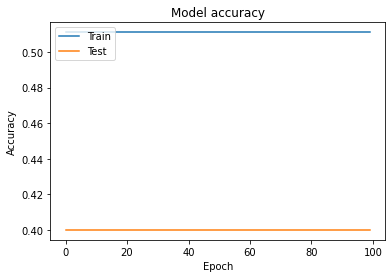

In [89]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

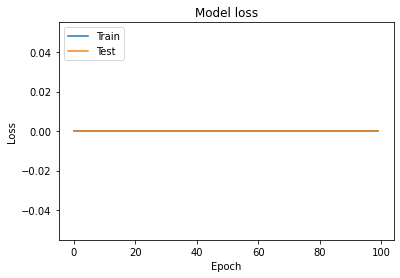

In [90]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

We see that the Accuracy is 100% for the above model. 